# **Imports**

In [ ]:
# pip install keras_tuner 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
import keras_tuner as kt
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

# **Load Data**

In [ ]:
X = pd.read_csv("tox21_global_cdf_rdkit.csv")
X = X.drop("('RDKit2DNormalized_calculated', <class 'bool'>)",axis = 1)

si = SimpleImputer(missing_values=np.nan,strategy="mean")
X = si.fit_transform(X)

X=pd.DataFrame(X)
X.shape


(7831, 200)

In [ ]:
y = pd.read_csv("tox21.csv")
y = y["NR-AR"]
             # setoon task ra be entehaye feature ha michasbanim
y.isnull().sum()
y=pd.DataFrame(y)
X["y"]=y
X.shape


(7831, 201)

In [ ]:
X=X.dropna(subset=["y"])
X.shape

(7265, 201)

In [ ]:
# hal ke dade ha moratab va tamiz shod aanha ra joda mikonim: 
y=X["y"]
y=pd.DataFrame(y)
y.shape

(7265, 1)

In [ ]:
y.isnull().sum()

y    0
dtype: int64

In [ ]:
y.value_counts()

y  
0.0    6956
1.0     309
dtype: int64

In [ ]:
X=X.drop("y",axis=1)
X=pd.DataFrame(X)
X.shape

(7265, 200)

In [ ]:
X.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

# **Select 150 features and Datasets**

### **f_classif**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
f_selector = SelectKBest(score_func=f_classif, k=150)
# apply feature selection
X_bestf = f_selector.fit_transform(X, y)
print(X_bestf)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_bestf.shape)

[[9.34798508e-01 1.77418306e-01 4.67654095e-02 ... 2.32414994e-16
  4.70359809e-08 9.75867246e-01]
 [8.75932246e-01 4.71732302e-02 2.93969770e-02 ... 2.32414994e-16
  4.70359809e-08 7.38637964e-01]
 [9.67576010e-01 5.97130378e-02 1.78132099e-01 ... 2.32414994e-16
  4.70359809e-08 8.78232962e-01]
 ...
 [4.70402899e-01 1.01406307e-01 1.61827367e-01 ... 2.32414994e-16
  4.70359809e-08 7.32113588e-01]
 [4.96564234e-01 1.19853959e-01 1.16662496e-01 ... 2.32414994e-16
  4.70359809e-08 7.71532441e-01]
 [3.31403040e-01 3.95539336e-01 2.99805002e-01 ... 2.32414994e-16
  4.70359809e-08 9.05782191e-01]]
Original number of features: (7265, 200)
Reduced number of features: (7265, 150)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_trainval_f, X_test_f, y_trainval_f, y_test_f= train_test_split(X_bestf, y, test_size = 0.1,stratify=y, random_state = 1)


In [ ]:
y_trainval.value_counts()

y  
0.0    6260
1.0     278
dtype: int64

In [ ]:
y_test.value_counts()

y  
0.0    696
1.0     31
dtype: int64

In [ ]:
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_trainval_f, y_trainval_f, test_size = 0.1,stratify=y_trainval_f, random_state = 1)

In [ ]:
y_train.value_counts()

y  
0.0    5634
1.0     250
dtype: int64

In [ ]:
y_val.value_counts()

y  
0.0    626
1.0     28
dtype: int64

### **chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_selector = SelectKBest(score_func=chi2, k=150)
X_bestchi2 = chi2_selector.fit_transform(X, y)
print(X_bestchi2)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_bestchi2.shape)

[[9.34798508e-01 1.77418306e-01 4.67654095e-02 ... 2.32414994e-16
  4.70359809e-08 9.75867246e-01]
 [8.75932246e-01 4.71732302e-02 2.93969770e-02 ... 2.32414994e-16
  4.70359809e-08 7.38637964e-01]
 [9.67576010e-01 5.97130378e-02 1.78132099e-01 ... 2.32414994e-16
  4.70359809e-08 8.78232962e-01]
 ...
 [4.70402899e-01 1.01406307e-01 1.61827367e-01 ... 2.32414994e-16
  4.70359809e-08 7.32113588e-01]
 [4.96564234e-01 1.19853959e-01 1.16662496e-01 ... 2.32414994e-16
  4.70359809e-08 7.71532441e-01]
 [3.31403040e-01 3.95539336e-01 2.99805002e-01 ... 2.32414994e-16
  4.70359809e-08 9.05782191e-01]]
Original number of features: (7265, 200)
Reduced number of features: (7265, 150)


In [ ]:
X_trainval_ch, X_test_ch, y_trainval_ch, y_test_ch= train_test_split(X_bestchi2, y, test_size = 0.1,stratify=y, random_state = 1)
X_train_ch, X_val_ch, y_train_ch, y_val_ch = train_test_split(X_trainval_ch, y_trainval_ch, test_size = 0.1,stratify=y_trainval_ch, random_state = 1)

### **mutual_info_classif**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
mi_selector= SelectKBest(score_func=mutual_info_classif, k=150)
X_bestmi=mi_selector.fit_transform(X,y)
print(X_bestmi)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_bestmi.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.93479851 0.17741831 0.04676541 ... 0.16837837 0.1666334  0.97586725]
 [0.87593225 0.04717323 0.02939698 ... 0.16837837 0.99999998 0.73863796]
 [0.96757601 0.05971304 0.1781321  ... 0.16837837 0.1666334  0.87823296]
 ...
 [0.4704029  0.10140631 0.16182737 ... 0.16837837 0.1666334  0.73211359]
 [0.49656423 0.11985396 0.1166625  ... 0.16837837 0.1666334  0.77153244]
 [0.33140304 0.39553934 0.299805   ... 0.16837837 0.1666334  0.90578219]]
Original number of features: (7265, 200)
Reduced number of features: (7265, 150)


In [ ]:
X_trainval_mi, X_test_mi, y_trainval_mi, y_test_mi= train_test_split(X_bestmi, y, test_size = 0.1,stratify=y, random_state = 1)
X_train_mi, X_val_mi, y_train_mi, y_val_mi = train_test_split(X_trainval_mi, y_trainval_mi, test_size = 0.1,stratify=y_trainval_mi, random_state = 1)

# **KT**

## **1 hidden layer**

### **Create Model for Keras Tuner**

In [ ]:
# 1 hidden layer
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [150],
        )
    )


    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    # model.add(
    #     Dense(
    #         units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
    #         activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
    #     )
    # )

    # if hp.Boolean("dropout_2"):
    #     model.add(Dropout(rate = 0.2))
    
    
    model.add(Dense(1, activation="sigmoid"))

    learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(learning_rate=learning_rate),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

#### **f_classif**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train_f, y_train_f, epochs = 50, validation_data = (X_val_f, y_val_f))

Trial 50 Complete [00h 00m 41s]
val_accuracy: 0.9816513657569885

Best val_accuracy So Far: 0.9816513657569885
Total elapsed time: 00h 28m 56s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 310
activation_1: sigmoid
dropout_1: True
lr: 0.1
Score: 0.9816513657569885


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_f, y_test_f)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9670
test set loss: 0.13578620553016663 , test set accuracy : 0.9669876098632812


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 310,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'bias_constraint': No

#### **chi2**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train_ch, y_train_ch, epochs = 50, validation_data = (X_val_ch, y_val_ch))

Trial 50 Complete [00h 00m 24s]
val_accuracy: 0.9847095012664795

Best val_accuracy So Far: 0.9847095012664795
Total elapsed time: 00h 27m 01s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 460
activation_1: relu
dropout_1: False
lr: 0.1
Score: 0.9847095012664795


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_ch, y_test_ch)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9670
test set loss: 0.13552166521549225 , test set accuracy : 0.9669876098632812


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 460,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializ

#### **mutual_info_classif**

In [ ]:
# 1 hidden layer
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 50,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network",
)

tuner.search(X_train_mi, y_train_mi, epochs = 50, validation_data = (X_val_mi, y_val_mi))

Trial 50 Complete [00h 00m 41s]
val_accuracy: 0.9816513657569885

Best val_accuracy So Far: 0.9831804037094116
Total elapsed time: 00h 28m 15s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 260
activation_1: sigmoid
dropout_1: False
lr: 0.1
Score: 0.9831804037094116


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.9656
test set loss: 0.12622112035751343 , test set accuracy : 0.9656121134757996


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 260,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initia

### **define final model model for KT**

#### **f_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(310, activation = 'sigmoid', input_shape = [150]))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

Epoch 1/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1821 - accuracy: 0.9524 - val_loss: 0.1532 - val_accuracy: 0.9572
Epoch 2/500
184/184 [==============================] - 0s 3ms/step - loss: 0.1611 - accuracy: 0.9575 - val_loss: 0.1371 - val_accuracy: 0.9572
Epoch 3/500
184/184 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9573 - val_loss: 0.1309 - val_accuracy: 0.9572
Epoch 4/500
184/184 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9587 - val_loss: 0.1191 - val_accuracy: 0.9572
Epoch 5/500
184/184 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9582 - val_loss: 0.1133 - val_accuracy: 0.9572
Epoch 6/500
184/184 [==============================] - 0s 3ms/step - loss: 0.1439 - accuracy: 0.9601 - val_loss: 0.1067 - val_accuracy: 0.9587
Epoch 7/500
184/184 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9609 - val_loss: 0.1034 - val_accuracy: 0.9694

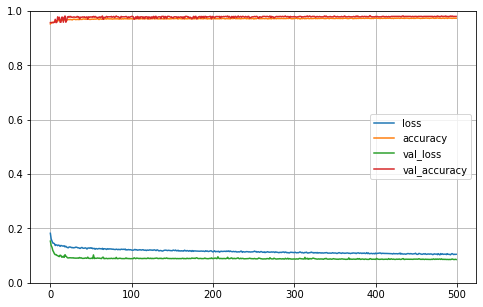

In [ ]:
KT_model_f1 = create_final_model_for_KT()

history = KT_model_f1.fit(X_train_f, y_train_f, epochs = 500, validation_data=(X_val_f,y_val_f))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_f1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 310)               46810     
                                                                 
 dropout_3 (Dropout)         (None, 310)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 311       
                                                                 
Total params: 47,121
Trainable params: 47,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_f1.save("my_KT_model_f1")
# KT_model_f1= keras.models.load_model("my_KT_model_f1")

In [ ]:
f=KT_model_f1.evaluate(X_test_f, y_test_f)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9670
test set loss: 0.12109345942735672  , test set accuracy : 0.9669876098632812


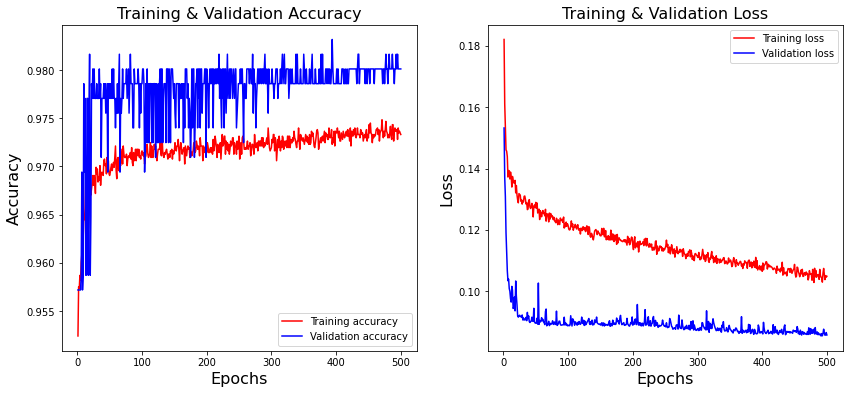

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **chi2**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(460, activation = 'relu', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

Epoch 1/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1622 - accuracy: 0.9541 - val_loss: 0.1073 - val_accuracy: 0.9740
Epoch 2/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9670 - val_loss: 0.0947 - val_accuracy: 0.9771
Epoch 3/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9711 - val_loss: 0.0908 - val_accuracy: 0.9771
Epoch 4/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9708 - val_loss: 0.0896 - val_accuracy: 0.9755
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9720 - val_loss: 0.0887 - val_accuracy: 0.9755
Epoch 6/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1183 - accuracy: 0.9728 - val_loss: 0.0896 - val_accuracy: 0.9786
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9725 - val_loss: 0.0867 - val_accuracy: 0.9786
Epoch 

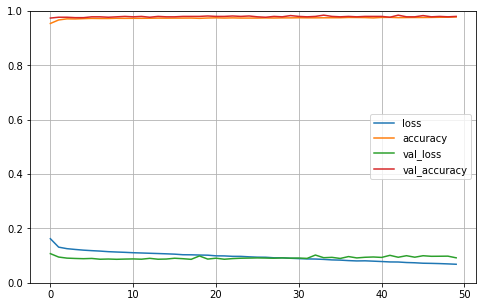

In [ ]:
KT_model_ch1 = create_final_model_for_KT()

history = KT_model_ch1.fit(X_train_ch, y_train_ch, epochs = 50, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_ch1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 460)               69460     
                                                                 
 dense_7 (Dense)             (None, 1)                 461       
                                                                 
Total params: 69,921
Trainable params: 69,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_ch1.save("my_KT_model_ch1")
# KT_model_ch1= keras.models.load_model("my_KT_model_ch1")

In [ ]:
f=KT_model_ch1.evaluate(X_test_ch, y_test_ch)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9684
test set loss: 0.13090334832668304  , test set accuracy : 0.9683631658554077


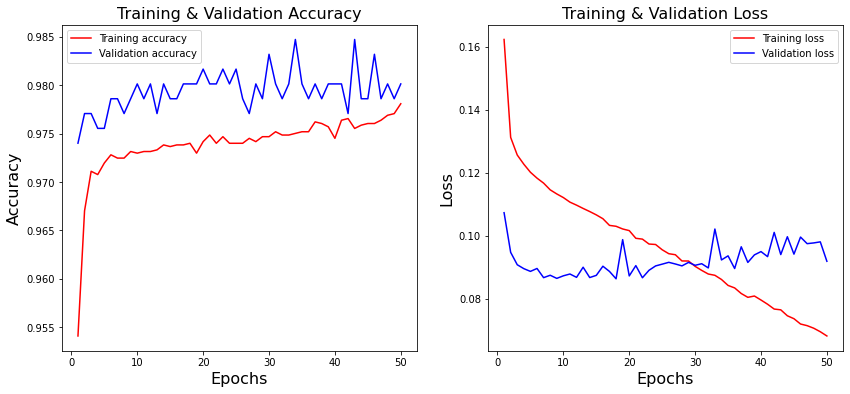

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/30
184/184 [==============================] - 1s 3ms/step - loss: 0.1611 - accuracy: 0.9575 - val_loss: 0.1075 - val_accuracy: 0.9709
Epoch 2/30
184/184 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9670 - val_loss: 0.0955 - val_accuracy: 0.9786
Epoch 3/30
184/184 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9711 - val_loss: 0.0915 - val_accuracy: 0.9786
Epoch 4/30
184/184 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9709 - val_loss: 0.0901 - val_accuracy: 0.9786
Epoch 5/30
184/184 [==============================] - 0s 2ms/step - loss: 0.1207 - accuracy: 0.9721 - val_loss: 0.0896 - val_accuracy: 0.9771
Epoch 6/30
184/184 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9723 - val_loss: 0.0902 - val_accuracy: 0.9786
Epoch 7/30
184/184 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9725 - val_loss: 0.0875 - val_accuracy: 0.9786
Epoch 

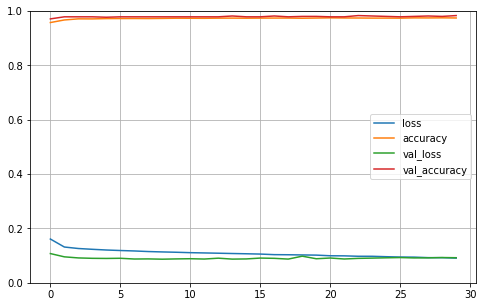

In [ ]:
KT_model_ch1best = create_final_model_for_KT()

history = KT_model_ch1best.fit(X_train_ch, y_train_ch, epochs = 30, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
f=KT_model_ch1best.evaluate(X_test_ch, y_test_ch)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9670
test set loss: 0.12873953580856323  , test set accuracy : 0.9669876098632812


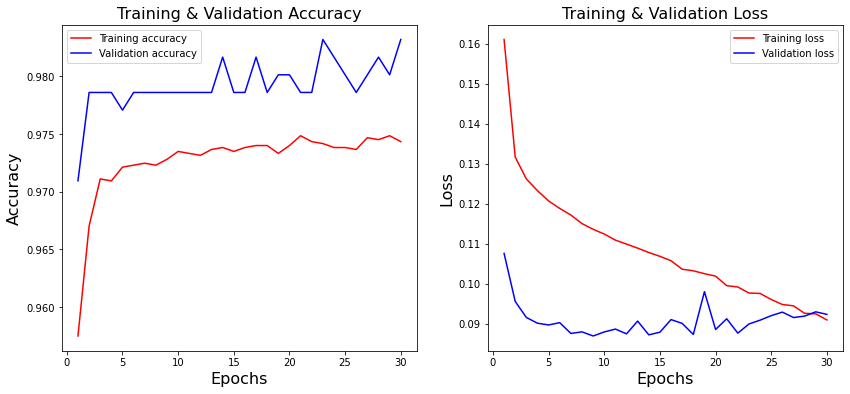

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **mutual_info_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'sigmoid', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

Epoch 1/500
184/184 [==============================] - 1s 3ms/step - loss: 0.1716 - accuracy: 0.9575 - val_loss: 0.1532 - val_accuracy: 0.9572
Epoch 2/500
184/184 [==============================] - 0s 2ms/step - loss: 0.1562 - accuracy: 0.9575 - val_loss: 0.1349 - val_accuracy: 0.9572
Epoch 3/500
184/184 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9575 - val_loss: 0.1235 - val_accuracy: 0.9572
Epoch 4/500
184/184 [==============================] - 0s 3ms/step - loss: 0.1412 - accuracy: 0.9582 - val_loss: 0.1121 - val_accuracy: 0.9572
Epoch 5/500
184/184 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9587 - val_loss: 0.1068 - val_accuracy: 0.9572
Epoch 6/500
184/184 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9619 - val_loss: 0.1021 - val_accuracy: 0.9709
Epoch 7/500
184/184 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9646 - val_loss: 0.0990 - val_accuracy: 0.9771

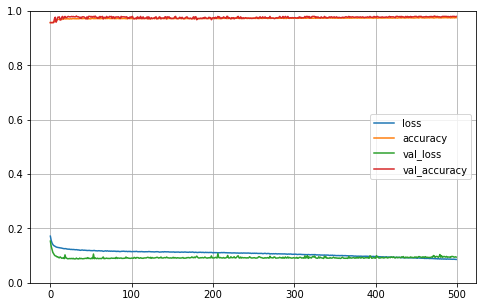

In [ ]:
KT_model_mi1 = create_final_model_for_KT()

history = KT_model_mi1.fit(X_train_mi, y_train_mi, epochs = 500, validation_data=(X_val_mi,y_val_mi))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_mi1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 260)               39260     
                                                                 
 dense_13 (Dense)            (None, 1)                 261       
                                                                 
Total params: 39,521
Trainable params: 39,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_mi1.save("my_KT_model_mi1")
# KT_model_mi1= keras.models.load_model("my_KT_model_mi1")

In [ ]:
f=KT_model_mi1.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9670
test set loss: 0.12544475495815277  , test set accuracy : 0.9669876098632812


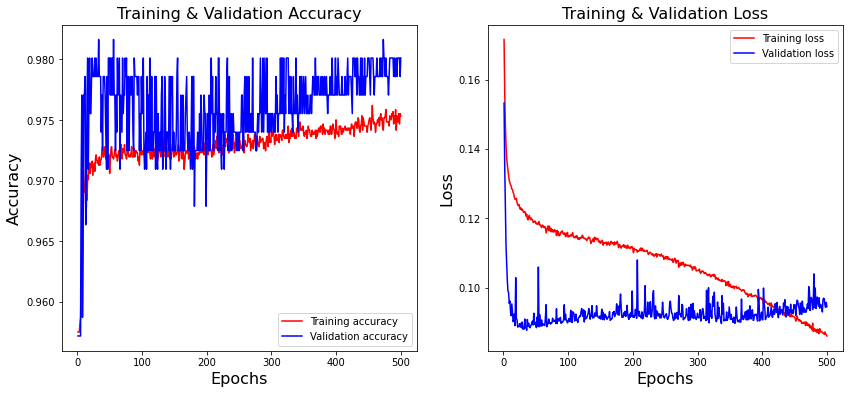

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/420
184/184 [==============================] - 1s 3ms/step - loss: 0.1720 - accuracy: 0.9524 - val_loss: 0.1501 - val_accuracy: 0.9572
Epoch 2/420
184/184 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9575 - val_loss: 0.1330 - val_accuracy: 0.9572
Epoch 3/420
184/184 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.9575 - val_loss: 0.1226 - val_accuracy: 0.9572
Epoch 4/420
184/184 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9580 - val_loss: 0.1118 - val_accuracy: 0.9572
Epoch 5/420
184/184 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9584 - val_loss: 0.1066 - val_accuracy: 0.9572
Epoch 6/420
184/184 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9618 - val_loss: 0.1021 - val_accuracy: 0.9694
Epoch 7/420
184/184 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9643 - val_loss: 0.0990 - val_accuracy: 0.9771

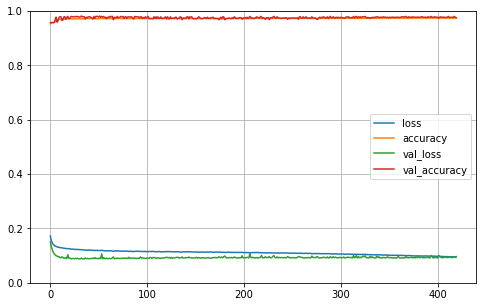

In [ ]:
KT_model_mi1best = create_final_model_for_KT()

history = KT_model_mi1best.fit(X_train_mi, y_train_mi, epochs = 420, validation_data=(X_val_mi,y_val_mi))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
f=KT_model_mi1best.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9684
test set loss: 0.12471507489681244  , test set accuracy : 0.9683631658554077


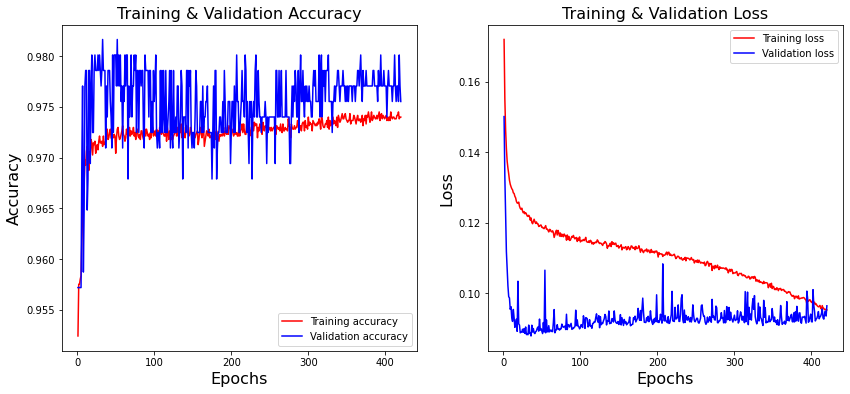

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## **2 hidden layers**

### **Create Model for Keras Tuner**

In [ ]:
# 2 hidden layers
def create_model_for_KT(hp):

    model = Sequential()
    
    model.add(
        Dense(
            units = hp.Int("units_1", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_1", ["sigmoid", "relu"]),
            input_shape = [150],
        )
    )

    if hp.Boolean("dropout_1"):
        model.add(Dropout(rate = 0.2))

    model.add(
        Dense(
            units = hp.Int("units_2", min_value = 10, max_value = 500, step = 50),
            activation = hp.Choice("activation_2", ["sigmoid", "relu"]),
        )
    )

    if hp.Boolean("dropout_2"):
        model.add(Dropout(rate = 0.2))

    
    model.add(Dense(1, activation="sigmoid"))

    learning_rate = hp.Choice("lr",values=[0.1,0.01,0.001,0.0001])

    model.compile(
        optimizer = SGD(learning_rate=learning_rate),
        loss = "binary_crossentropy",
        metrics = ["accuracy"],
    )

    return model

### **Keras Tuner**

#### **f_classif**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 30,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train_f, y_train_f, epochs = 50, validation_data = (X_val_f, y_val_f))

Trial 30 Complete [00h 00m 32s]
val_accuracy: 0.9816513657569885

Best val_accuracy So Far: 0.9816513657569885
Total elapsed time: 00h 21m 57s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 160
activation_1: relu
dropout_1: False
units_2: 460
activation_2: sigmoid
dropout_2: True
lr: 0.1
Score: 0.9816513657569885


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_f, y_test_f)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9670
test set loss: 0.1272568702697754 , test set accuracy : 0.9669876098632812


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 160,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'sigmoid',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializ

#### **chi2**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 30,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train_ch, y_train_ch, epochs = 50, validation_data = (X_val_ch, y_val_ch))

Trial 30 Complete [00h 00m 41s]
val_accuracy: 0.9831804037094116

Best val_accuracy So Far: 0.9847095012664795
Total elapsed time: 00h 21m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 260
activation_1: relu
dropout_1: False
units_2: 10
activation_2: relu
dropout_2: True
lr: 0.1
Score: 0.9847095012664795


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_ch, y_test_ch)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9697
test set loss: 0.15850649774074554 , test set accuracy : 0.9697386622428894


In [ ]:
best_model.get_config()

#### **mutual_info_classif**

In [ ]:
# 2 hidden layers
tuner = kt.BayesianOptimization(
    hypermodel = create_model_for_KT,
    objective = "val_accuracy",
    max_trials = 30,
    executions_per_trial = 1,
    overwrite = True,
    directory = ".",
    project_name = "Neural Network2",
)

tuner.search(X_train_mi, y_train_mi, epochs = 50, validation_data = (X_val_mi, y_val_mi))

Trial 30 Complete [00h 00m 41s]
val_accuracy: 0.9801223278045654

Best val_accuracy So Far: 0.9847095012664795
Total elapsed time: 00h 25m 48s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary(1)

Results summary
Results in ./Neural Network2
Showing 1 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_1: 260
activation_1: relu
dropout_1: False
units_2: 110
activation_2: relu
dropout_2: True
lr: 0.1
Score: 0.9847095012664795


In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 150))
b=best_model.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {b[0]} , test set accuracy : {b[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9684
test set loss: 0.1594637781381607 , test set accuracy : 0.9683631658554077


In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150),
    'dtype': 'float32',
    'name': 'dense_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 260,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer'

### **define final model model for KT**

#### **f_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(160, activation = 'relu', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(460, activation="sigmoid"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ["accuracy"])

    return model

Epoch 1/100
184/184 [==============================] - 1s 5ms/step - loss: 0.1809 - accuracy: 0.9575 - val_loss: 0.1603 - val_accuracy: 0.9572
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1651 - accuracy: 0.9575 - val_loss: 0.1369 - val_accuracy: 0.9572
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1508 - accuracy: 0.9585 - val_loss: 0.1227 - val_accuracy: 0.9572
Epoch 4/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1425 - accuracy: 0.9611 - val_loss: 0.1075 - val_accuracy: 0.9572
Epoch 5/100
184/184 [==============================] - 1s 4ms/step - loss: 0.1376 - accuracy: 0.9628 - val_loss: 0.1008 - val_accuracy: 0.9572
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1382 - accuracy: 0.9650 - val_loss: 0.0947 - val_accuracy: 0.9709
Epoch 7/100
184/184 [==============================] - 1s 3ms/step - loss: 0.1337 - accuracy: 0.9667 - val_loss: 0.0922 - val_accuracy: 0.9755

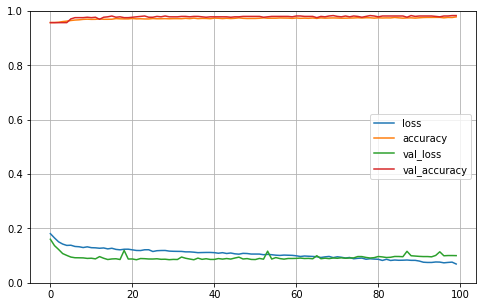

In [ ]:
KT_model_f2 = create_final_model_for_KT()

history = KT_model_f2.fit(X_train_f, y_train_f, epochs = 100, validation_data=(X_val_f,y_val_f))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_f2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 160)               24160     
                                                                 
 dense_4 (Dense)             (None, 460)               74060     
                                                                 
 dropout_1 (Dropout)         (None, 460)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 461       
                                                                 
Total params: 98,681
Trainable params: 98,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_f2.save("my_KT_model_f2")
# KT_model_f2= keras.models.load_model("my_KT_model_f2")

In [ ]:
f=KT_model_f2.evaluate(X_test_f, y_test_f)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9711
test set loss: 0.1412457823753357  , test set accuracy : 0.9711141586303711


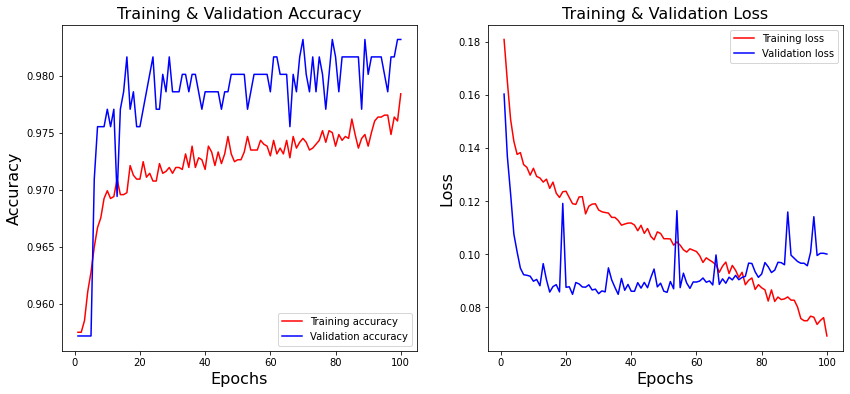

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/70
184/184 [==============================] - 1s 4ms/step - loss: 0.1864 - accuracy: 0.9524 - val_loss: 0.1551 - val_accuracy: 0.9572
Epoch 2/70
184/184 [==============================] - 1s 3ms/step - loss: 0.1626 - accuracy: 0.9575 - val_loss: 0.1328 - val_accuracy: 0.9572
Epoch 3/70
184/184 [==============================] - 1s 3ms/step - loss: 0.1484 - accuracy: 0.9572 - val_loss: 0.1239 - val_accuracy: 0.9572
Epoch 4/70
184/184 [==============================] - 1s 3ms/step - loss: 0.1443 - accuracy: 0.9596 - val_loss: 0.1096 - val_accuracy: 0.9572
Epoch 5/70
184/184 [==============================] - 1s 3ms/step - loss: 0.1405 - accuracy: 0.9614 - val_loss: 0.1022 - val_accuracy: 0.9572
Epoch 6/70
184/184 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.9628 - val_loss: 0.0958 - val_accuracy: 0.9709
Epoch 7/70
184/184 [==============================] - 1s 3ms/step - loss: 0.1358 - accuracy: 0.9672 - val_loss: 0.0937 - val_accuracy: 0.9725
Epoch 

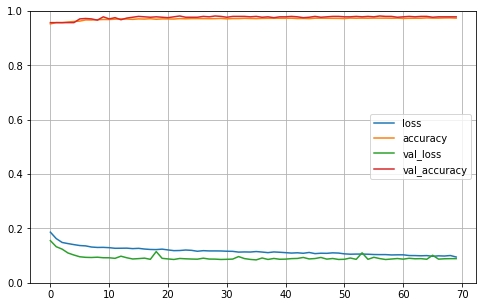

In [ ]:
KT_model_f2best = create_final_model_for_KT()

history = KT_model_f2best.fit(X_train_f, y_train_f, epochs = 70, validation_data=(X_val_f,y_val_f))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
f=KT_model_f2best.evaluate(X_test_f, y_test_f)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1221 - accuracy: 0.9684
test set loss: 0.12208005040884018  , test set accuracy : 0.9683631658554077


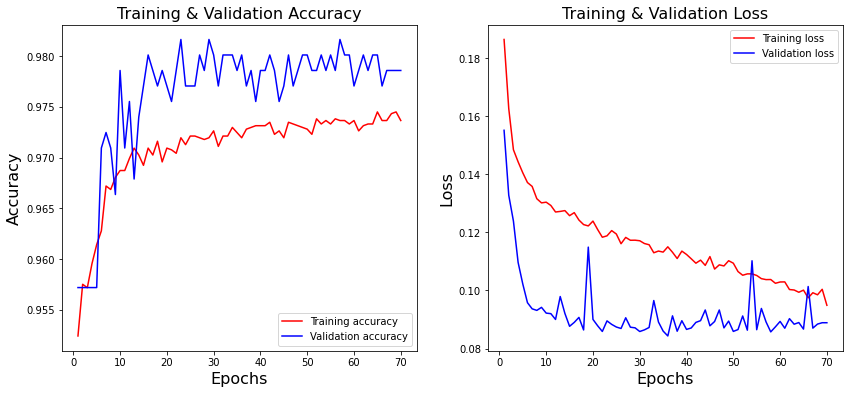

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **chi2**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer =sgd , metrics = ["accuracy"])

    return model

Epoch 1/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1854 - accuracy: 0.9550 - val_loss: 0.1158 - val_accuracy: 0.9572
Epoch 2/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1469 - accuracy: 0.9575 - val_loss: 0.1050 - val_accuracy: 0.9572
Epoch 3/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9587 - val_loss: 0.0994 - val_accuracy: 0.9587
Epoch 4/50
184/184 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9640 - val_loss: 0.0966 - val_accuracy: 0.9664
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1317 - accuracy: 0.9684 - val_loss: 0.0937 - val_accuracy: 0.9694
Epoch 6/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9684 - val_loss: 0.0920 - val_accuracy: 0.9786
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9694 - val_loss: 0.0900 - val_accuracy: 0.9786
Epoch 

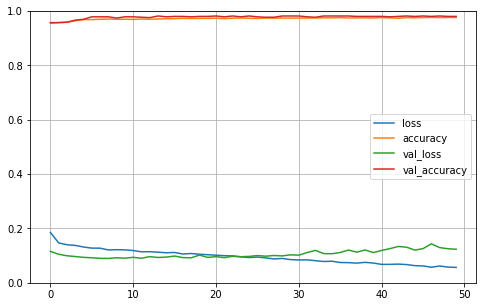

In [ ]:
KT_model_ch2 = create_final_model_for_KT()

history = KT_model_ch2.fit(X_train_ch, y_train_ch, epochs = 50, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_ch2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 260)               39260     
                                                                 
 dense_7 (Dense)             (None, 10)                2610      
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41,881
Trainable params: 41,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_ch2.save("my_KT_model_ch2")
# KT_model_ch2= keras.models.load_model("my_KT_model_ch2")

In [ ]:
f=KT_model_ch2.evaluate(X_test_ch, y_test_ch)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9711
test set loss: 0.16501489281654358  , test set accuracy : 0.9711141586303711


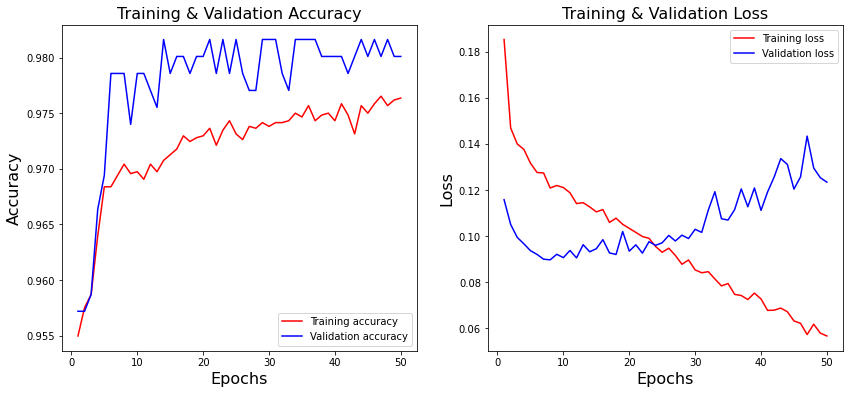

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1860 - accuracy: 0.9524 - val_loss: 0.1163 - val_accuracy: 0.9572
Epoch 2/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9599 - val_loss: 0.0979 - val_accuracy: 0.9572
Epoch 3/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1368 - accuracy: 0.9679 - val_loss: 0.0938 - val_accuracy: 0.9771
Epoch 4/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9677 - val_loss: 0.0920 - val_accuracy: 0.9740
Epoch 5/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9704 - val_loss: 0.0896 - val_accuracy: 0.9740
Epoch 6/25
184/184 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9694 - val_loss: 0.0941 - val_accuracy: 0.9786
Epoch 7/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1270 - accuracy: 0.9699 - val_loss: 0.0902 - val_accuracy: 0.9801
Epoch 

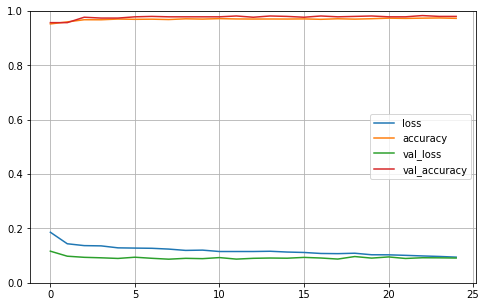

In [ ]:
KT_model_ch2best = create_final_model_for_KT()

history = KT_model_ch2best.fit(X_train_ch, y_train_ch, epochs = 25, validation_data=(X_val_ch,y_val_ch))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
f=KT_model_ch2best.evaluate(X_test_ch, y_test_ch)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9670
test set loss: 0.12874747812747955  , test set accuracy : 0.9669876098632812


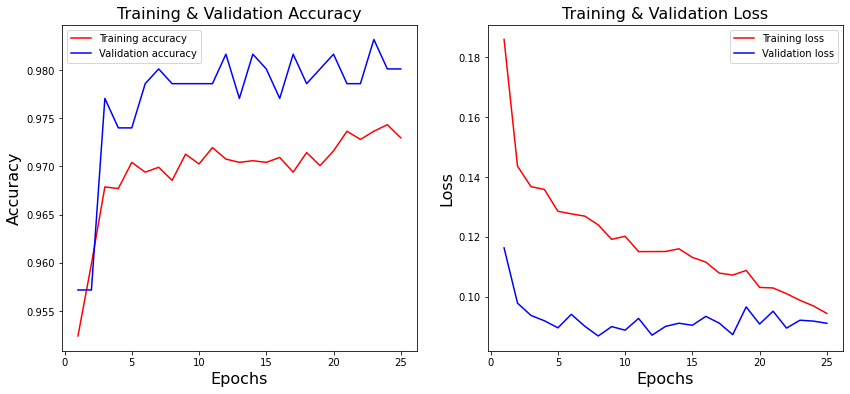

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

#### **mutual_info_classif**

In [ ]:
def create_final_model_for_KT():

    model = Sequential()
    
    model.add(Dense(260, activation = 'relu', input_shape = [150]))
    # model.add(Dropout(rate=0.2))
    model.add(Dense(110, activation="relu"))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation="sigmoid"))
    sgd=keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss = "binary_crossentropy", optimizer =sgd , metrics = ["accuracy"])

    return model

Epoch 1/50
184/184 [==============================] - 1s 4ms/step - loss: 0.1577 - accuracy: 0.9580 - val_loss: 0.1032 - val_accuracy: 0.9771
Epoch 2/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1304 - accuracy: 0.9686 - val_loss: 0.0911 - val_accuracy: 0.9771
Epoch 3/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1265 - accuracy: 0.9720 - val_loss: 0.0894 - val_accuracy: 0.9786
Epoch 4/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9721 - val_loss: 0.0890 - val_accuracy: 0.9786
Epoch 5/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9728 - val_loss: 0.0867 - val_accuracy: 0.9771
Epoch 6/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.9730 - val_loss: 0.0890 - val_accuracy: 0.9786
Epoch 7/50
184/184 [==============================] - 1s 3ms/step - loss: 0.1163 - accuracy: 0.9726 - val_loss: 0.0856 - val_accuracy: 0.9801
Epoch 

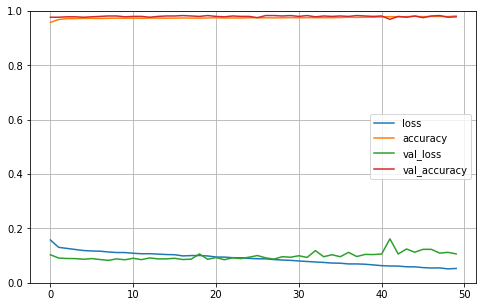

In [ ]:
KT_model_mi2 = create_final_model_for_KT()

history = KT_model_mi2.fit(X_train_mi, y_train_mi, epochs = 50, validation_data=(X_val_mi,y_val_mi))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
KT_model_mi2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 260)               39260     
                                                                 
 dense_16 (Dense)            (None, 110)               28710     
                                                                 
 dropout_5 (Dropout)         (None, 110)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 111       
                                                                 
Total params: 68,081
Trainable params: 68,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# KT_model_mi2.save("my_KT_model_mi2")
# KT_model_mi2= keras.models.load_model("my_KT_model_mi2")

In [ ]:
f=KT_model_mi2.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.9725
test set loss: 0.15378250181674957  , test set accuracy : 0.9724896550178528


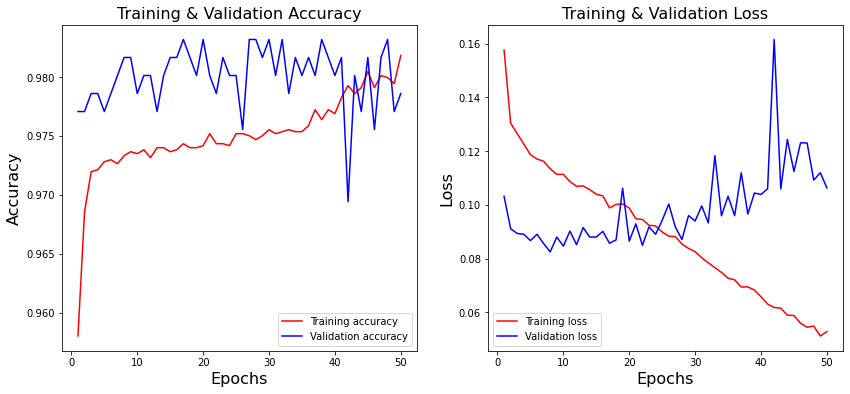

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

**BEST**

Epoch 1/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1678 - accuracy: 0.9543 - val_loss: 0.1034 - val_accuracy: 0.9771
Epoch 2/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9689 - val_loss: 0.0902 - val_accuracy: 0.9786
Epoch 3/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1260 - accuracy: 0.9718 - val_loss: 0.0884 - val_accuracy: 0.9786
Epoch 4/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 0.9714 - val_loss: 0.0887 - val_accuracy: 0.9755
Epoch 5/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1196 - accuracy: 0.9721 - val_loss: 0.0860 - val_accuracy: 0.9801
Epoch 6/25
184/184 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9728 - val_loss: 0.0873 - val_accuracy: 0.9786
Epoch 7/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9718 - val_loss: 0.0854 - val_accuracy: 0.9817
Epoch 

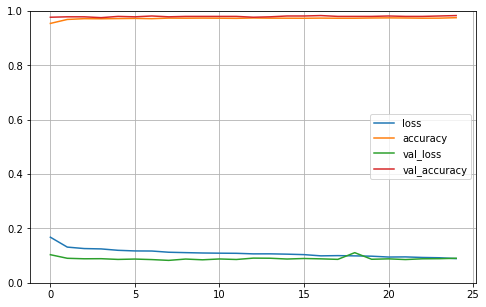

In [ ]:
KT_model_mi2best = create_final_model_for_KT()

history = KT_model_mi2best.fit(X_train_mi, y_train_mi, epochs = 25, validation_data=(X_val_mi,y_val_mi))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
f=KT_model_mi2best.evaluate(X_test_mi, y_test_mi)
print(f"test set loss: {f[0]}  , test set accuracy : {f[1]}")

23/23 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9670
test set loss: 0.1311931610107422  , test set accuracy : 0.9669876098632812


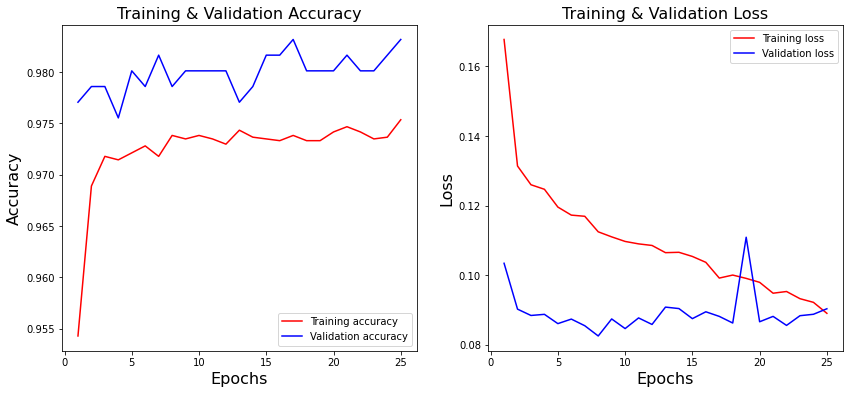

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training accuracy',color="red")
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss',color="red") 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

# **Predict**

In [ ]:
X_newf = X_test_f[:10]
X_newch = X_test_ch[:10]
X_newmi = X_test_mi[:10]

y_prob_1= KT_model_f1.predict(X_newf)
y_prob_2= KT_model_f2best.predict(X_newf)

y_prob_3= KT_model_ch1.predict(X_newch)
y_prob_4= KT_model_ch2best.predict(X_newch)

y_prob_5= KT_model_mi1best.predict(X_newmi)
y_prob_6= KT_model_mi2best.predict(X_newmi)


In [ ]:
print(y_prob_1.round(5))
print(y_prob_2.round(5))
print(y_prob_3.round(5))
print(y_prob_4.round(5))
print(y_prob_5.round(5))
print(y_prob_6.round(5))

[[0.00414]
 [0.00124]
 [0.04994]
 [0.00146]
 [0.00685]
 [0.01893]
 [0.00781]
 [0.0101 ]
 [0.043  ]
 [0.86472]]
[[0.00305]
 [0.00207]
 [0.04316]
 [0.00328]
 [0.00466]
 [0.03091]
 [0.01378]
 [0.03497]
 [0.0491 ]
 [0.9349 ]]
[[0.00572]
 [0.00142]
 [0.0201 ]
 [0.00202]
 [0.01567]
 [0.02315]
 [0.03086]
 [0.02369]
 [0.03634]
 [0.76968]]
[[0.00445]
 [0.00246]
 [0.04077]
 [0.00249]
 [0.00357]
 [0.0478 ]
 [0.02307]
 [0.04294]
 [0.02241]
 [0.85764]]
[[0.00764]
 [0.00195]
 [0.05237]
 [0.00379]
 [0.01454]
 [0.03486]
 [0.01423]
 [0.03494]
 [0.10567]
 [0.86696]]
[[0.00477]
 [0.00192]
 [0.02773]
 [0.00227]
 [0.00368]
 [0.03765]
 [0.01587]
 [0.03339]
 [0.02262]
 [0.77088]]


In [ ]:
seq_predictions_1 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_1))
seq_predictions_2 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_2))
seq_predictions_3 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_3))
seq_predictions_4 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_4))
seq_predictions_5 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_5))
seq_predictions_6 = list(map(lambda x: 0 if x<0.5 else 1, y_prob_6))


print(f"real lables   : {list(map(int,list(y_test_f[:10]['y'])))}")
print(f"KT1f lables   : {(seq_predictions_1)}")
print(f"KT2f lables   : {(seq_predictions_2)}")
print("---------------------------------------------------")
print(f"real lables   : {list(map(int,list(y_test_ch[:10]['y'])))}")
print(f"KT1ch lables  : {(seq_predictions_3)}")
print(f"KT2ch lables  : {(seq_predictions_4)}")
print("---------------------------------------------------")
print(f"real lables   : {list(map(int,list(y_test_mi[:10]['y'])))}")
print(f"KT1mi lables  : {(seq_predictions_5)}")
print(f"KT2mi lables  : {(seq_predictions_6)}")



real lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
KT1f lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
KT2f lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
---------------------------------------------------
real lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
KT1ch lables  : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
KT2ch lables  : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
---------------------------------------------------
real lables   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
KT1mi lables  : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
KT2mi lables  : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
